In [1]:
import numpy as np
from scipy.sparse.linalg import *
from scipy.constants import *
from matplotlib import pyplot as plt
from scipy.spatial import Delaunay
from scipy.interpolate import griddata
%matplotlib inline

In [2]:
from QCircuit import *
from AdaptiveParametricSpaceMapper import AdaptiveParametricSpaceMapper

In [4]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['GND', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['2', '3'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['GND', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['2', '3'])
        

phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phie = QVariable('φ')
phi1.create_grid(24, 1)
phi2.create_grid(24, 1)


FQ3JJ.add_variable(phi1)
FQ3JJ.add_variable(phi2)
FQ3JJ.add_variable(phie)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
                       ['φ1', 'φ2', 'φ'], 
                       np.asarray([[0,0,0],[1,0,0],[0,1,0],[1,0,1]]))
                       

alpha = 0.62
flux_steps = 128
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 140e9
Ec = 3e9
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))

phi_range = np.linspace((0.495)*2*np.pi, (0.505)*2*np.pi, flux_steps)

for phie_id, phie_value in enumerate(phi_range):
    phie.set_parameter(phie_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    energies[phie_id, :] = eigenenergies

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


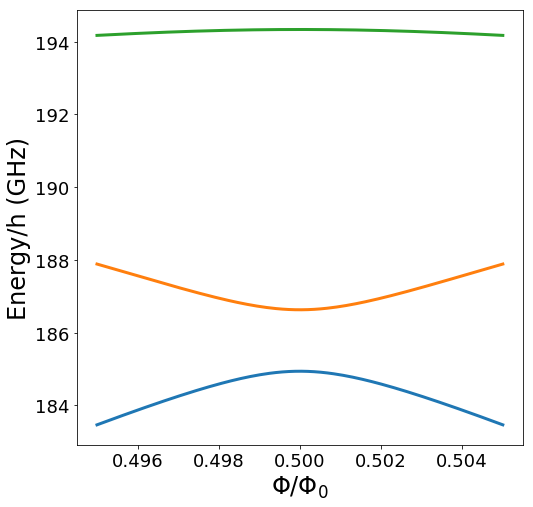

In [5]:
fig, axes = plt.subplots(figsize=(8, 8))

plt.plot(phi_range/2/np.pi,  (energies[:,0])/1e9, linewidth=3.0,  label='0')
plt.plot(phi_range/2/np.pi,  (energies[:,1])/1e9, linewidth=3.0,  label='1')
plt.plot(phi_range/2/np.pi,  (energies[:,2])/1e9, linewidth=3.0,  label='2')

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Energy/h (GHz)', fontsize=24)

axes.axis('tight')

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#plt.gcf().set_size_inches(8,8)
#plt.savefig("C:/neon/levels_twin_close_1_2_levels.pdf", bbox_inches="tight")

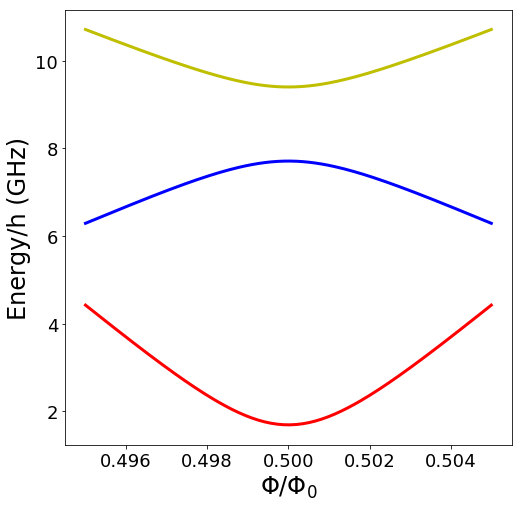

In [6]:
fig, axes = plt.subplots(figsize=(8, 8))

plt.plot(phi_range/2/np.pi,  (energies[:,1] - energies[:,0])/1e9, color = 'r', linewidth=3.0)
plt.plot(phi_range/2/np.pi,  (energies[:,2] - energies[:,1])/1e9, color = 'b', linewidth=3.0)
plt.plot(phi_range/2/np.pi,  (energies[:,2] - energies[:,0])/1e9, color = 'y', linewidth=3.0)

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Energy/h (GHz)', fontsize=24)

axes.axis('tight')

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#plt.gcf().set_size_inches(8,8)
#plt.savefig("C:/neon/levels_twin_close_1_2_levels.pdf", bbox_inches="tight")